In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [42]:
df = pd.read_csv(r"C:\Users\devi\Downloads\archive (9)\heart_dataset\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [44]:
df.duplicated().sum()

723

In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
df.shape

(302, 14)

In [49]:
X = df.drop("target", axis = 1)
y = df["target"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [51]:
ss = StandardScaler()
scale_train = ss.fit_transform(X_train)
scale_test = ss.fit_transform(X_test)
print(scale_train[:5])
print("===============================================================================")
print(scale_test[:5])

[[-0.04977525  0.69707639 -0.05479281  3.43955295  0.66689864 -0.44594129
  -1.06657475  2.03560555 -0.70459485 -0.88006548  0.95729534  0.25357804
   1.10379735]
 [-0.26632325  0.69707639 -0.05479281  0.15204522 -0.84537925 -0.44594129
   0.84060552  0.37152466 -0.70459485 -0.17029456  0.95729534  0.25357804
  -0.53635223]
 [-0.37459726 -1.434563    0.90864738  0.49213222  1.12795898 -0.44594129
  -1.06657475 -0.34807789 -0.70459485  0.45075499  0.95729534  0.25357804
  -0.53635223]
 [ 1.79088277 -1.434563   -1.018233   -1.09494047 -1.80438474 -0.44594129
   0.84060552 -1.1126556  -0.70459485  0.53947636 -0.75447853 -0.7018678
  -0.53635223]
 [-0.59114526  0.69707639 -0.05479281 -0.07467945  0.35337762 -0.44594129
   0.84060552  0.95620173 -0.70459485 -0.34773729  0.95729534 -0.7018678
  -0.53635223]]
[[-1.20907747  0.64951905  0.25821516 -0.13113552 -0.59127225 -0.35136418
  -0.8678342   1.60025701 -0.68391661 -0.94959164  1.0479138  -0.75677315
  -0.46354723]
 [ 0.89780434 -1.539600

# LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lgr_model = LogisticRegression().fit(X_train, y_train)
y_pred = lgr_model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)

In [55]:
accuracy_of_LR = 100-mse

accuracy_of_LR

99.83516483516483

# NAIVEBAYES

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb_model = GaussianNB().fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

In [58]:
mse1 = mean_squared_error(y_test, y_pred)

In [59]:
accuracy_of_NB = 100-mse1

accuracy_of_NB

99.84615384615384

# SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svc_model = SVC().fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [62]:
mse2 = mean_squared_error(y_test, y_pred)

In [63]:
accuracy_of_SVC = 100-mse2

accuracy_of_SVC

99.56043956043956

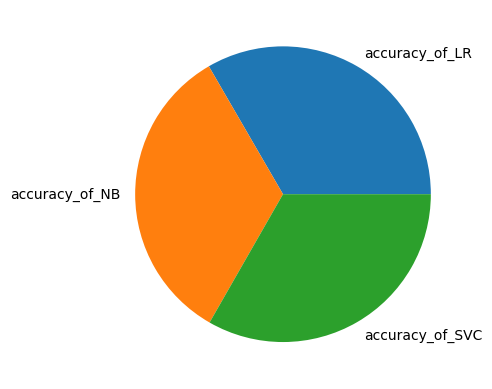

In [65]:
accuracy = ['accuracy_of_LR', 'accuracy_of_NB', 'accuracy_of_SVC']
accuracy_score = [99.83516483516483, 99.84615384615384, 99.56043956043956]
plt.pie(accuracy_score, labels = accuracy)
plt.show()